# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
### Estudiante : Miguel Ángel Jaramillo Valencia
#### Métodos Computacionales 2024-2
---
1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$

---

2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $ V(r) $ es el potencial en función de la distancia interatómica $ r $.
- $ \epsilon $ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $ \sigma $ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $ r $ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{2/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{2/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.


---
3.  El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres al español.


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.




# Ejercicio 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def grafica_v_vs_a(v_m, a_p):


 t = np.arange(0, 15, 1)

 plt.plot(t , v_m * t)
 plt.plot(t, 1/2 * a_p * t**2)
 plt.grid()
 plt.title('Gráfica posición Moto vs Policia')
 plt.xlabel('Tiempo')
 plt.ylabel('Posición a partir de la ecuación de movimiento')
 plt.legend(['Moto', 'Policía'] )

 return plt.show()

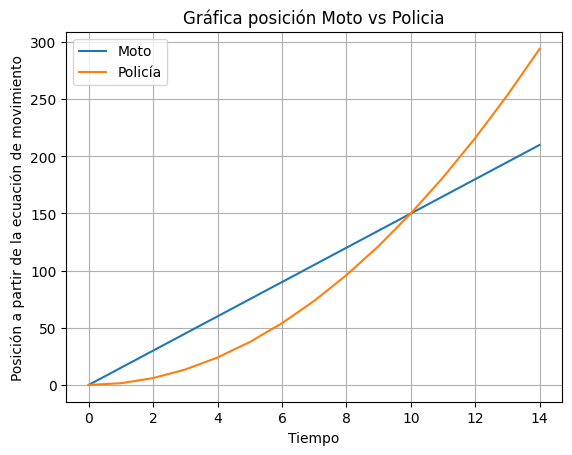

In [ ]:
grafica_v_vs_a(15, 3)

#Ejercicio 2

In [ ]:
def Potencial_LJ(epsilon, sigma, radio):

  V = 4 * epsilon * ((sigma / radio)** 12 - ((sigma / radio) ** 6))

  return(V)

Text(0, 0.5, 'Potencial')

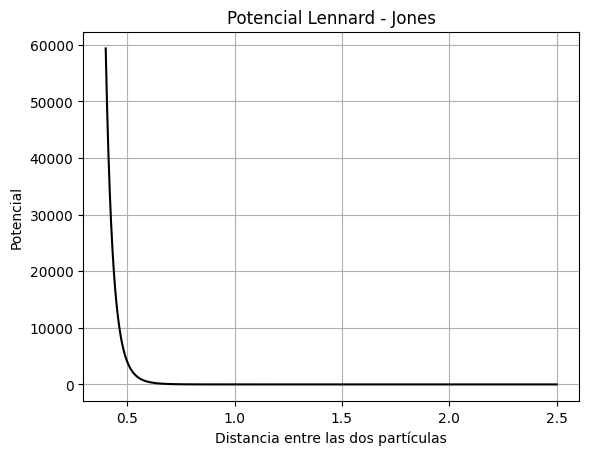

In [ ]:
epsilon = 1
sigma = 1

radio = np.linspace(0.4, 2.5, 1000)

V = (epsilon / radio) ** 12 - (sigma / radio) ** 6

plt.plot(radio, V, 'k')
plt.grid()
plt.title('Potencial Lennard - Jones')
plt.xlabel('Distancia entre las dos partículas')
plt.ylabel('Potencial')

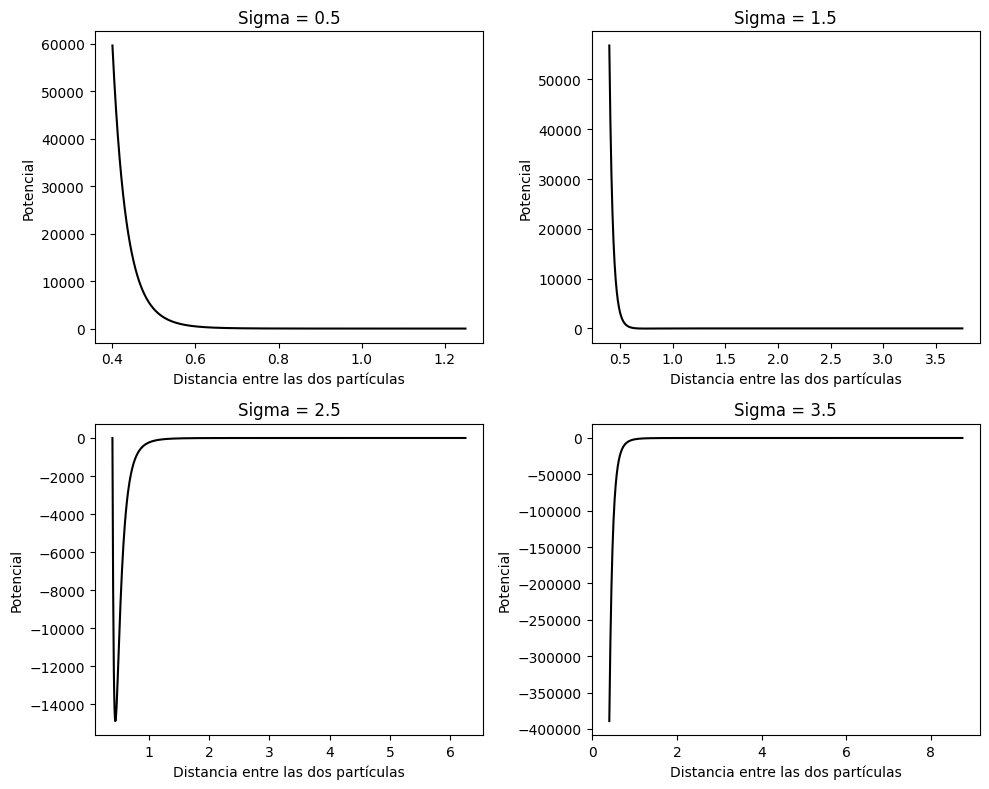

In [ ]:
epsilon = 1

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

radio = np.linspace(0.4, 2.5 * sigma, 1000)

V = (epsilon / radio) ** 12 - (sigma / radio) ** 6

for i in range(2):
  for j in range(2):
    sigma = 0.5 + 1 * (2 * i + j)

    radio = np.linspace(0.4, 2.5 * sigma, 1000)

    V = (epsilon / radio) ** 12 - (sigma / radio) ** 6

    axs[i,j].plot(radio, V, 'k')
    axs[i, j].set_title(f'Sigma = {sigma}')
    axs[i, j].set_xlabel('Distancia entre las dos partículas')
    axs[i, j].set_ylabel('Potencial')
plt.tight_layout()
plt.show()

#Ejercicio 3

In [ ]:
!pip install googletrans==3.1.0a0
from googletrans import Translator
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

In [ ]:
df = alturas
df = df.drop('Girls 19 (in)', axis = 1 )
df = df.drop('Boys 19 (in)', axis = 1 )

df.rename(columns = {'Average Height, Boys, 19 yo (cm)':'Boys 19 (cm)'}, inplace = True)

In [ ]:
def traducir(palabra):
  translator = Translator()
  traduccion = translator.translate(palabra, dest = 'es')
  return traduccion.text

In [ ]:
palabras_trad = []

for palabra in df.columns:
  palabras_trad.append(traducir(palabra))

df.columns = palabras_trad

df.head()

,País,Chicos 19 (cm),Niñas 19 (cm),Chicos 15 (cm),Niñas 15 (cm),Niños 10 (cm),Niñas 10 (cm),Niños 5 (cm),Niñas 5 (cm)
0,Netherlands,183.78,170.36,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,174.80,165.61,145.59,145.06,118.49,116.48


In [ ]:
df1 = df.sort_values(by = ['Chicos 19 (cm)','Niñas 19 (cm)'], ascending = True)
df2 = df.sort_values(by = ['Chicos 19 (cm)','Niñas 19 (cm)'], ascending = False)

colombia = df[df['País'] == 'Colombia']

df2 = df2[:10]

df1 = df1[: 10]

df1 = pd.concat([df1, colombia])

<ipython-input-13-a20032b2457d>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(paises_completos ,rotation= 90, fontsize = 10)


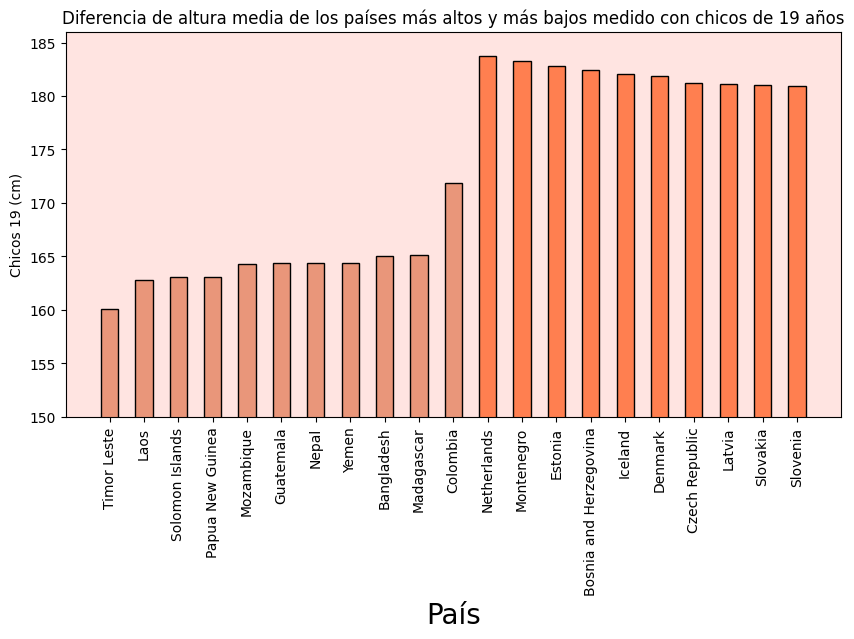

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))


paises = df1['País']
alturas = df1['Chicos 19 (cm)']

paises2 = df2['País']
alturas2 = df2['Chicos 19 (cm)']

paises_completos = paises.tolist() + paises2.tolist()



plt.bar(paises, alturas, color = 'darksalmon', width= 0.5, edgecolor = 'k')
plt.bar(paises2, alturas2, color = 'coral', width = 0.5, edgecolor = 'k')

ax.set_xlabel('País', fontsize = 20)
ax.set_ylabel('Altura', fontsize = 10)
ax.set_title('Diferencia de altura media de los países más altos y más bajos medido con chicos de 19 años')

ax.set_xticklabels(paises_completos ,rotation= 90, fontsize = 10)
ax.set_facecolor("mistyrose")

plt.yticks(np.arange(150, 186, 5))
ax.set_ylim(150, 186)

plt.show()

<ipython-input-14-7851cc397f5d>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(paises_completos ,rotation= 90, fontsize = 10)


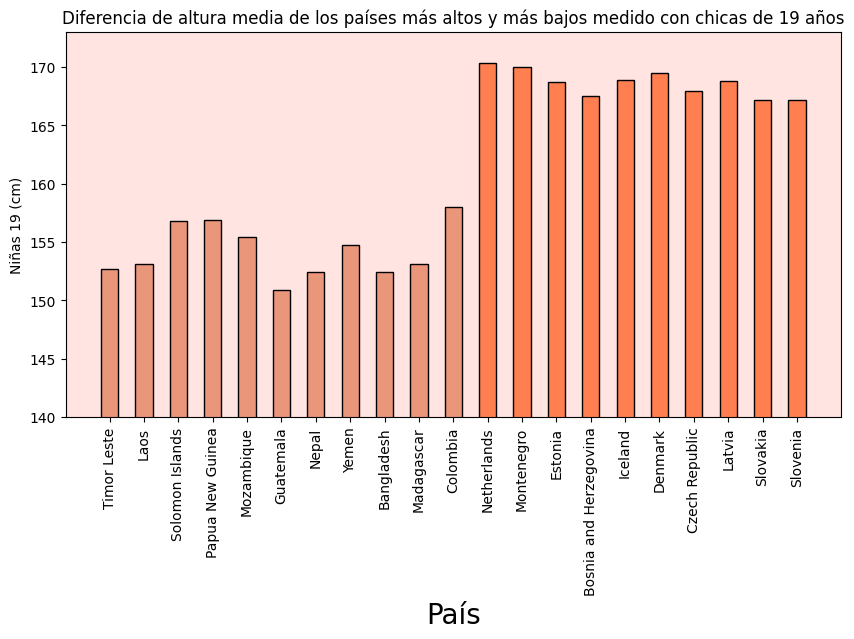

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))


paises = df1['País']
alturas = df1['Niñas 19 (cm)']

paises2 = df2['País']
alturas2 = df2['Niñas 19 (cm)']

plt.bar(paises, alturas, color = 'darksalmon', width= 0.5, edgecolor = 'k')
plt.bar(paises2, alturas2, color = 'coral', width = 0.5, edgecolor = 'k')

ax.set_xlabel('País', fontsize = 20)
ax.set_ylabel('Altura', fontsize = 10)
ax.set_title('Diferencia de altura media de los países más altos y más bajos medido con chicas de 19 años')

ax.set_xticklabels(paises_completos ,rotation= 90, fontsize = 10)
ax.set_facecolor("mistyrose")

plt.yticks(np.arange(140, 173, 5))
ax.set_ylim(140, 173)

plt.show()

In [ ]:
df_merged = income.merge(df, left_on = 'Country', right_on = 'País')

df_merged_bajos = df_merged.sort_values(by=['GDP per Adult (USD)'], ascending = True)
df_merged_bajos = df_merged_bajos[:10]

df_merged_altos = df_merged.sort_values(by=['GDP per Adult (USD)'], ascending = False)
df_merged_altos = df_merged_altos[:10]

In [ ]:
income['GDP per Adult (USD)'] = pd.to_numeric(income['GDP per Adult (USD)'].str.replace('$', '').str.replace(',', ''))

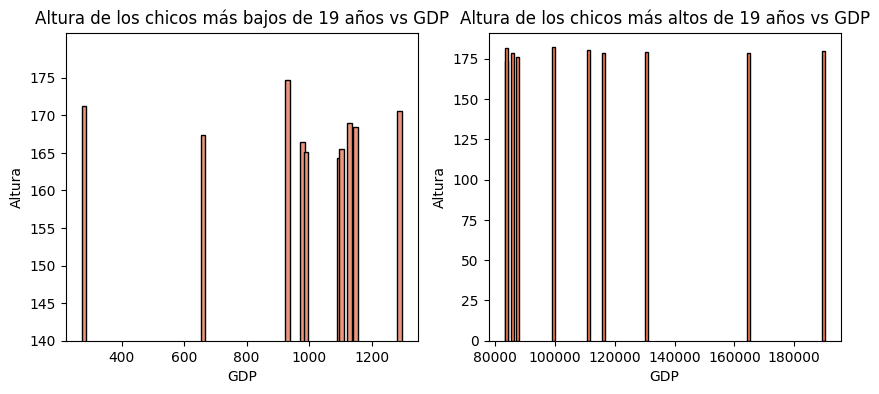

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

GDP = df_merged_bajos['GDP per Adult (USD)']
alturas_ = df_merged_bajos['Chicos 19 (cm)']

GDP_ = df_merged_altos['GDP per Adult (USD)']
alturas__ = df_merged_altos['Chicos 19 (cm)']

axs[0].bar(GDP, alturas_, color = 'darksalmon', width= 15, edgecolor = 'k')
axs[1].bar(GDP_, alturas__, color = 'coral', width= 1000, edgecolor = 'k')

axs[0].set_title('Altura de los chicos más bajos de 19 años vs GDP')
axs[0].set_xlabel('GDP')
axs[0].set_ylabel('Altura')
axs[1].set_title('Altura de los chicos más altos de 19 años vs GDP')
axs[1].set_xlabel('GDP')
axs[1].set_ylabel('Altura')

axs[0].set_yticks(np.arange(140, 176, 5))
axs[0].set_ylim(140, 176)
axs[0].set_ylim(140, 181)

plt.show()
plt.tight_layout()

 A partir de las gráficas se puede concluir que, efectivamente, el GDP (o PIB, como se conoce en Colombia) sí influye en la altura de las personas, ya que éste, entre muchos otros factores, refleja el desarrollo que puede tener una persona durante su infancia, como los alimentos, por ejemplo; lo cual determina en una buena parte, la altura.